# PPI with mutations
This notebook aims to create the network associated to Vitamin B12 methabolism and simulate its behaviour for specific MMACHC mutations 

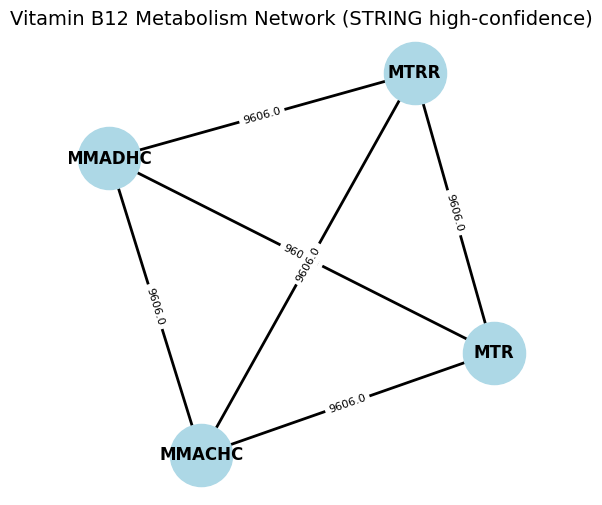

In [1]:
import requests
import networkx as nx
import matplotlib.pyplot as plt

# STRING API parameters
STRING_API_URL = "https://string-db.org/api"
OUTPUT_FORMAT = "tsv-no-header"
METHOD = "network"

# Target proteins
proteins = ["MMACHC", "MMADHC", "MTR", "MTRR"]
species_id = 9606  # Homo sapiens

# Build query string
identifiers = "%0d".join(proteins)  # %0d = carriage return for STRING API

# Call STRING API
request_url = f"{STRING_API_URL}/{OUTPUT_FORMAT}/{METHOD}"
params = {
    "identifiers": identifiers,
    "species": species_id,
    "required_score": 700,   # min score = 0.7 (high confidence)
    "add_nodes": 0,          # don't add extra nodes yet
    "network_flavor": "evidence"
}

response = requests.post(request_url, data=params)
if not response.ok:
    raise Exception("STRING API request failed")

# Parse edges
edges = []
for line in response.text.strip().split("\n"):
    p1, p2, score = line.strip().split("\t")[2:5]  # protein1, protein2, score
    edges.append((p1, p2, float(score)))

# Create graph
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Map node names to short gene symbols
mapping = {}
for node in G.nodes():
    mapping[node] = node.split(".")[-1]  # remove species prefix
G = nx.relabel_nodes(G, mapping)

# Plot
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos,
                             edge_labels={(u, v): f"{d['weight']:.1f}" for u, v, d in G.edges(data=True)},
                             font_size=8)
plt.axis("off")
plt.title("Vitamin B12 Metabolism Network (STRING high-confidence)", fontsize=14)
plt.show()


{}

In [8]:
# export to Cytoscape
with open("b12_network.sif", "w") as f:
    for u, v in G.edges():
        f.write(f"{u}\tpp\t{v}\n")
